In [11]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [18]:
N = 200
x_start, x_end = -6.0, 6.0
y_start, y_end = -2.0, 2.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [30]:
a_vortex = 0.4
N_vortex = (x_end - x_start) / a_vortex + 1
gamma = 1

x_vortex = np.arange(x_start, x_end + a_vortex, a_vortex)
y_vortex = np.zeros(int(N_vortex), dtype=float)

In [26]:
def get_vortex_velocity(strength, xv, yv, X, Y):
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
   #psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    return u, v

In [27]:
# initializing velocity vectors
u_tot = np.zeros((N, N), dtype=float)
v_tot = np.zeros((N, N), dtype=float)

In [28]:
# loop for calculation of superposition flow vortices row
for i in range(x_vortex.size):
    u_vortex, v_vortex = get_vortex_velocity(gamma, x_vortex[i], y_vortex[i], X, Y)
    
    u_tot = u_tot + u_vortex
    v_tot = v_tot + v_vortex

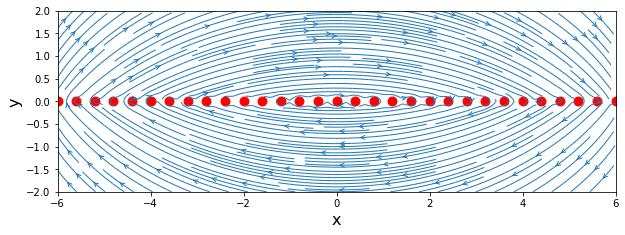

In [29]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_tot, v_tot, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='red', s=80, marker='o');

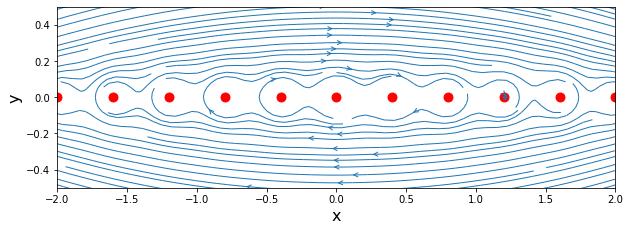

In [32]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-0.5, 0.5)
plt.streamplot(X, Y, u_tot, v_tot, density=5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_vortex, y_vortex, color='red', s=80, marker='o');

In [38]:
u_inf = +gamma / (2 * a_vortex) * (np.sinh(2*np.pi*Y/a_vortex)/(np.cosh(2*np.pi*Y/a_vortex - np.cos(2*np.pi*X/a_vortex))))
v_inf = -gamma / (2 * a_vortex) * (np.sin(2*np.pi*X/a_vortex)/(np.cosh(2*np.pi*Y/a_vortex - np.cos(2*np.pi*X/a_vortex))))

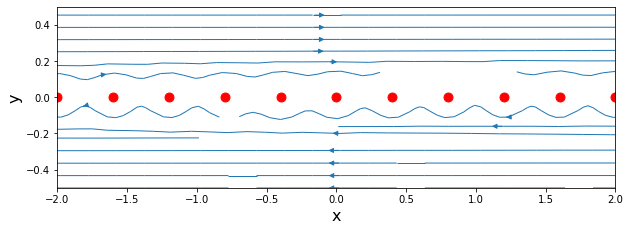

In [41]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-0.5, 0.5)
plt.streamplot(X, Y, u_inf, v_inf, density=2, linewidth=1)
plt.scatter(x_vortex, y_vortex, color='red', s=80, marker='o');